In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=columns)

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


1. **age**: Age of the patient in years.

2. **sex**: Sex of the patient.
   - 1 = Male
   - 0 = Female

3. **cp (chest pain type)**: Type of chest pain experienced by the patient.
   - 0 = Typical angina: chest pain related to decreased blood supply to the heart
   - 1 = Atypical angina: chest pain not related to heart
   - 2 = Non-anginal pain: not chest pain
   - 3 = Asymptomatic: no chest pain

4. **trestbps (resting blood pressure)**: Resting blood pressure in mm Hg at the time of hospital admission.

5. **chol (serum cholesterol)**: Serum cholesterol in mg/dL.

6. **fbs (fasting blood sugar)**: Fasting blood sugar > 120 mg/dL.
   - 1 = True
   - 0 = False

7. **restecg (resting electrocardiographic results)**: Resting electrocardiographic results.
   - 0 = Normal
   - 1 = Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   - 2 = Showing probable or definite left ventricular hypertrophy by Estes' criteria

8. **thalach (maximum heart rate achieved)**: Maximum heart rate achieved during a stress test.

9. **exang (exercise-induced angina)**: Exercise-induced angina.
   - 1 = Yes
   - 0 = No

10. **oldpeak**: ST depression induced by exercise relative to rest. Measures the difference between the heart's activity during rest and exercise.

11. **slope**: The slope of the peak exercise ST segment.
    - 0 = Upsloping: better heart rate with exercise (uncommon)
    - 1 = Flat: minimal change (typical healthy heart)
    - 2 = Downsloping: signs of unhealthy heart

12. **ca (number of major vessels colored by fluoroscopy)**: Number of major vessels (0-3) colored by fluoroscopy. This is a type of imaging that shows the flow of blood through the heart and vessels.

13. **thal**: Thalassemia (a type of blood disorder).
    - 1 = Normal
    - 2 = Fixed defect: no blood flow in some part of the heart
    - 3 = Reversible defect: a blood flow is observed but can become obstructed under certain conditions

14. **target**: Diagnosis of heart disease (the predicted attribute).
    - 0 = No heart disease
    - 1 = Heart disease present (values 1, 2, 3, 4 are typically consolidated to 1 for simplicity)

### Understanding These Features

These features include demographic information (age, sex), clinical measurements (trestbps, chol, thalach), and results from medical tests (restecg, ca, thal). They provide a comprehensive picture of a patient's health status and are used to build predictive models for heart disease diagnosis.

For instance:
- **Age and sex** are basic demographic features that can influence heart disease risk.
- **cp (chest pain type)** provides critical information on symptoms experienced by the patient.
- **trestbps (resting blood pressure)** and **chol (serum cholesterol)** are vital indicators of cardiovascular health.
- **thalach (maximum heart rate achieved)** during a stress test helps assess cardiac function.
- **exang (exercise-induced angina)** and **oldpeak (ST depression)** are key stress test results that indicate the heart's response to exercise.
- **ca (number of major vessels colored by fluoroscopy)** and **thal (thalassemia)** provide insights into the heart's structure and blood flow characteristics.


In [4]:
#size of the dataset
data.shape

(303, 14)

In [5]:
#Data Cleaning
# Replace '?' with NaN and convert to appropriate data types
data.replace('?', np.nan, inplace=True)
data = data.astype(float)

In [6]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1.0


In [7]:
# Handle missing values (using median imputation for simplicity)
data.fillna(data.median(), inplace=True)

In [8]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1.0


In [9]:
# Check for missing values
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [10]:
# Check data types
print(data.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target      float64
dtype: object


In [11]:
# Summary statistics
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


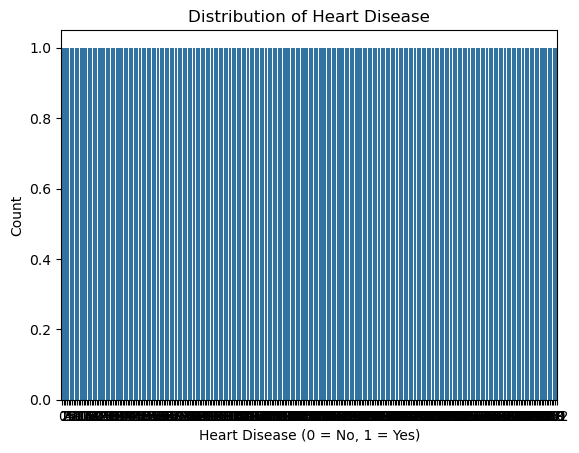

In [12]:
# Distribution of the target variable
sns.countplot(data['target'])
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

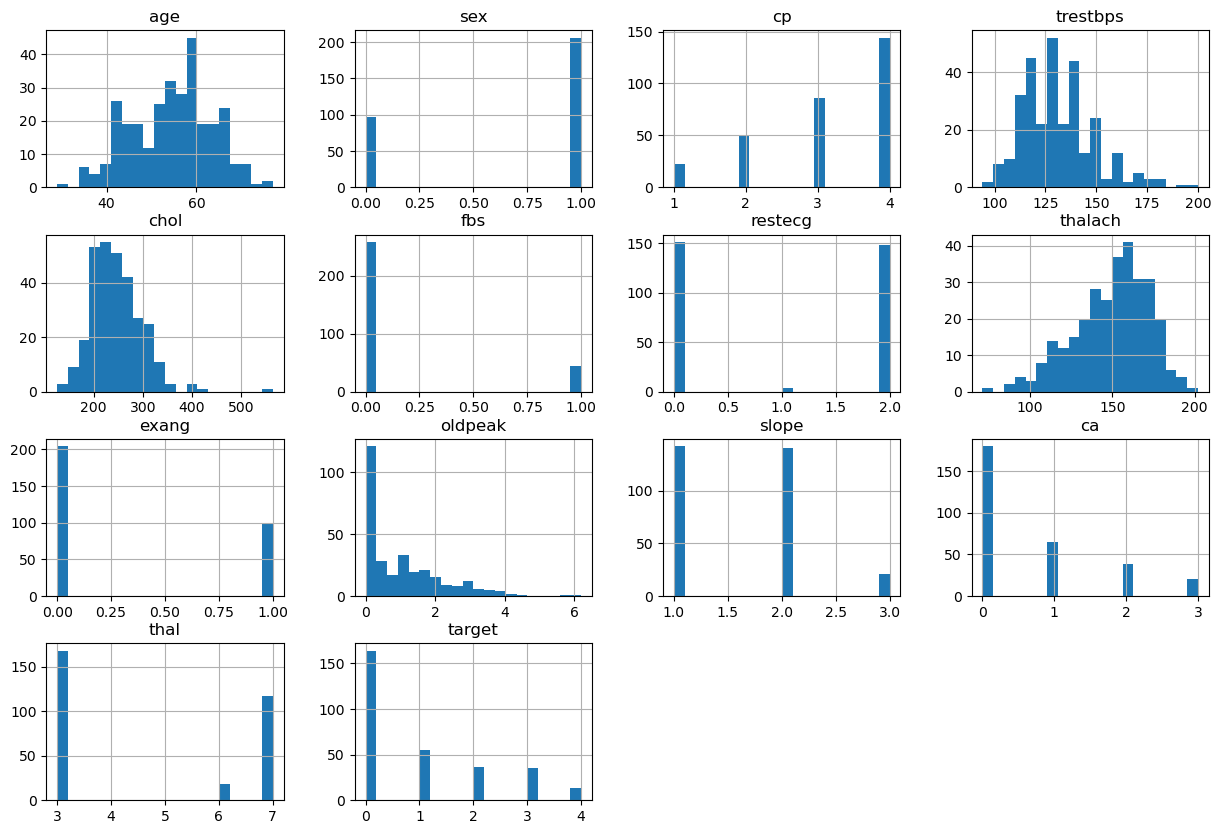

In [13]:
# Visualize the distribution of numerical features
data.hist(bins=20, figsize=(15, 10))
plt.show()

In [14]:
# Correlation matrix
correlation_matrix = data.corr()

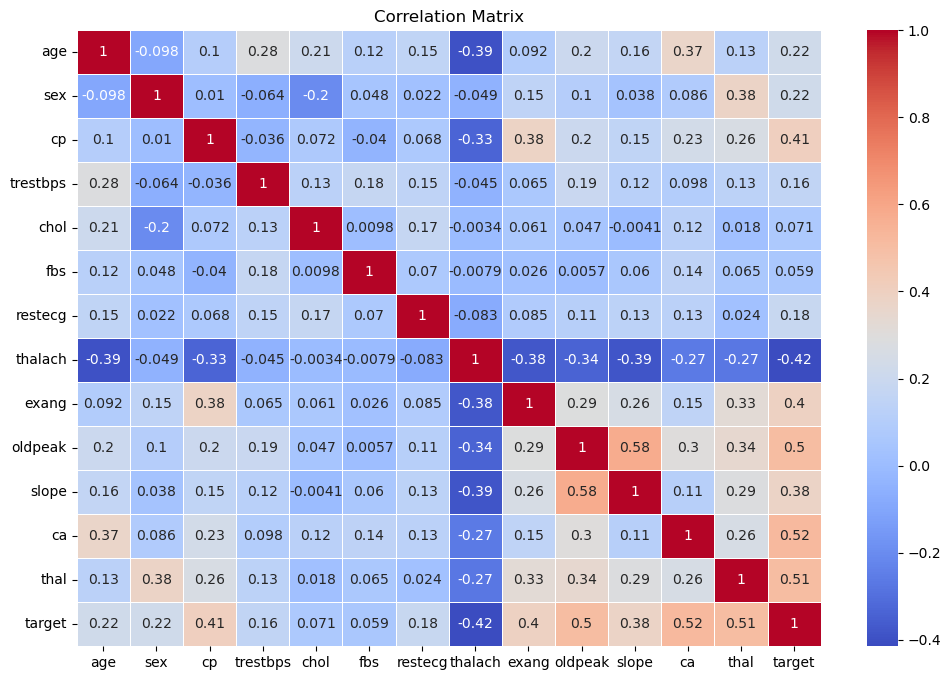

In [15]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

age and trestbps might have a weak positive correlation, while thalach (max heart rate) and age could have a negative correlation, indicating that younger people might have higher heart rates.

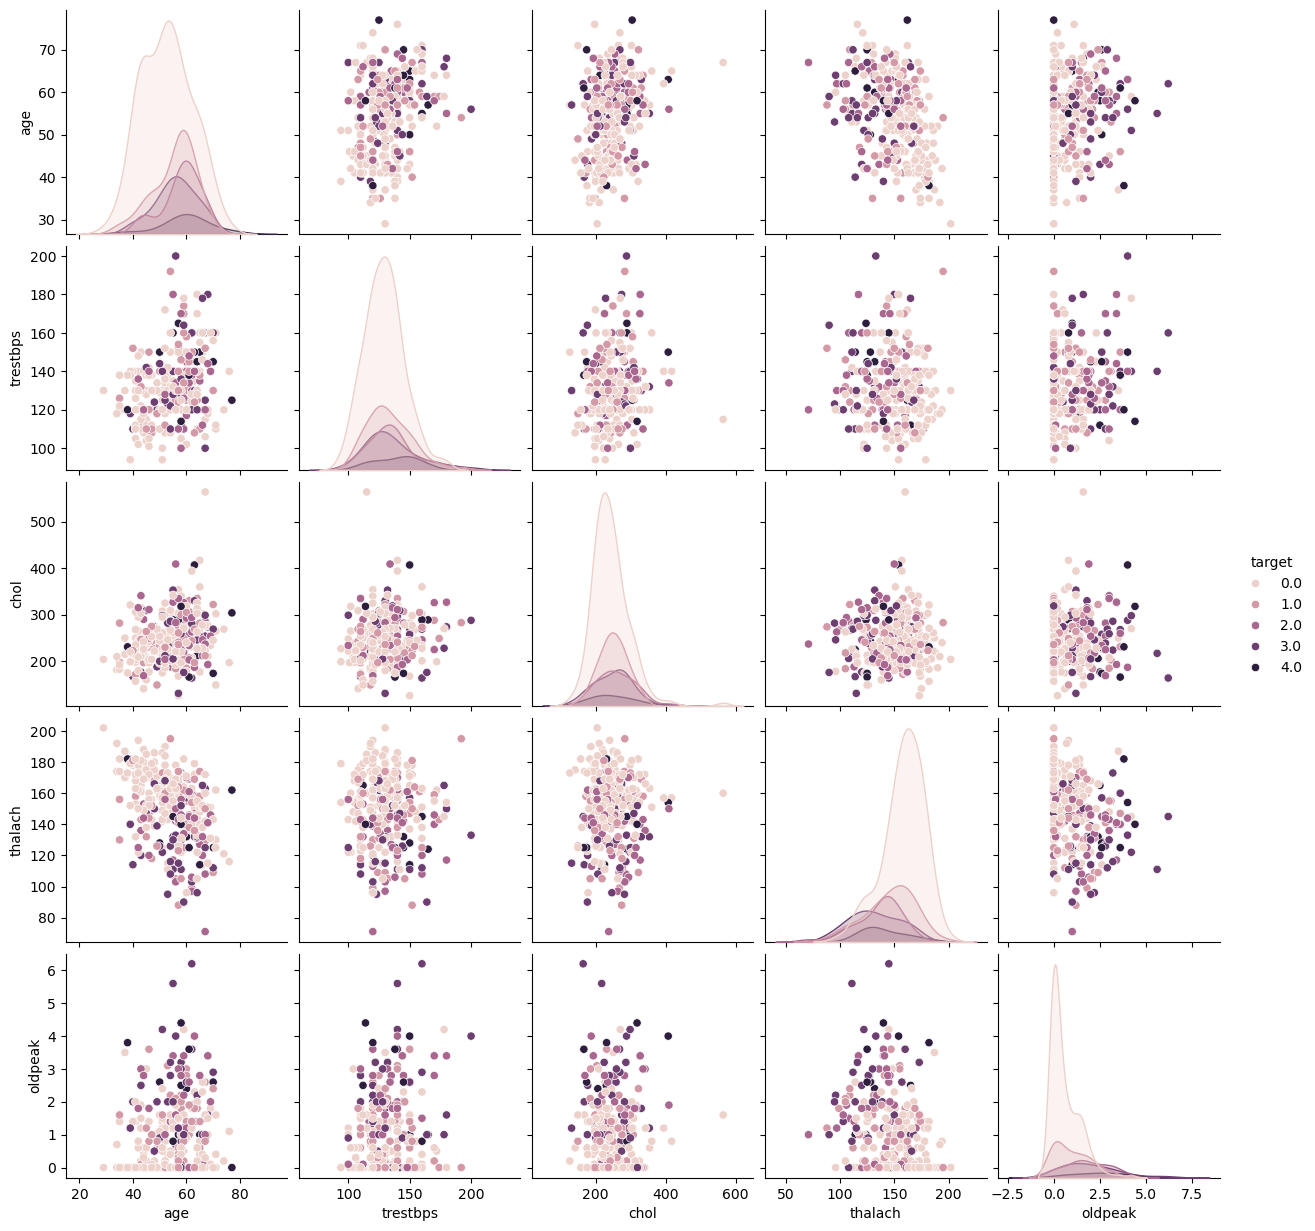

In [16]:
# Pairplot of features with target
sns.pairplot(data, hue='target', vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])
plt.show()

In [17]:
# Boxplot for categorical features
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Chest Pain Type vs Age')

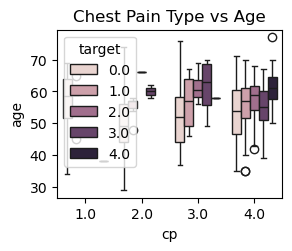

In [18]:
# Boxplot for 'cp' feature
plt.subplot(2, 2, 1)
sns.boxplot(x='cp', y='age', hue='target', data=data)
plt.title('Chest Pain Type vs Age')

Text(0.5, 1.0, 'Sex vs Age')

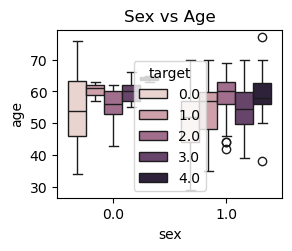

In [19]:
# Boxplot for 'sex' feature
plt.subplot(2, 2, 2)
sns.boxplot(x='sex', y='age', hue='target', data=data)
plt.title('Sex vs Age')

Text(0.5, 1.0, 'Fasting Blood Sugar vs Age')

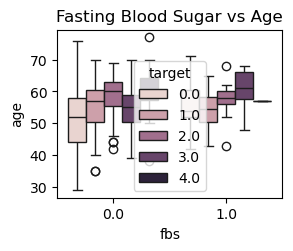

In [20]:
# Boxplot for 'fbs' feature
plt.subplot(2, 2, 3)
sns.boxplot(x='fbs', y='age', hue='target', data=data)
plt.title('Fasting Blood Sugar vs Age')

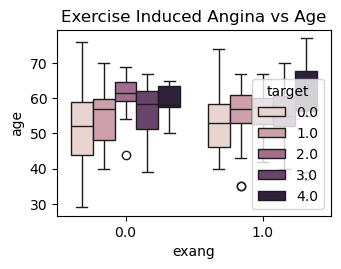

In [21]:
# Boxplot for 'exang' feature
plt.subplot(2, 2, 4)
sns.boxplot(x='exang', y='age', hue='target', data=data)
plt.title('Exercise Induced Angina vs Age')

plt.tight_layout()
plt.show()

In [22]:
# Convert target variable to binary (presence of heart disease)
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

In [23]:
# Separate features and target variable
X = data.drop('target', axis=1)
y = data['target']

In [24]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Create and train the decision tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
# Make predictions on the test set
y_pred = tree_classifier.predict(X_test)

In [27]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.7540983606557377
Precision: 0.7741935483870968
Recall: 0.75
F1 Score: 0.7619047619047619
Confusion Matrix:
[[22  7]
 [ 8 24]]


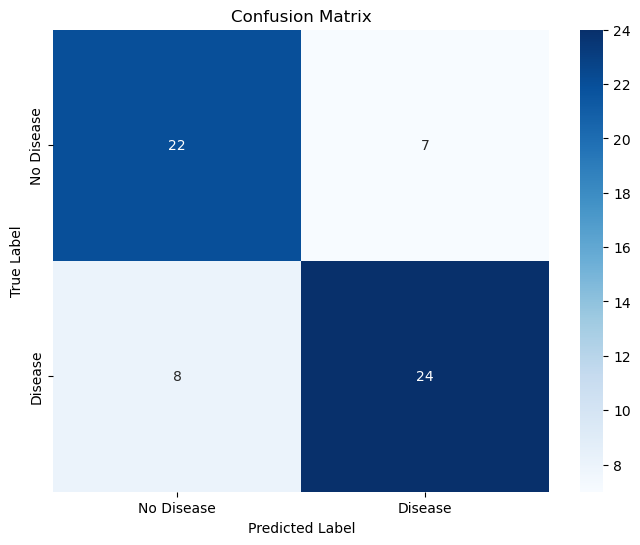

In [28]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

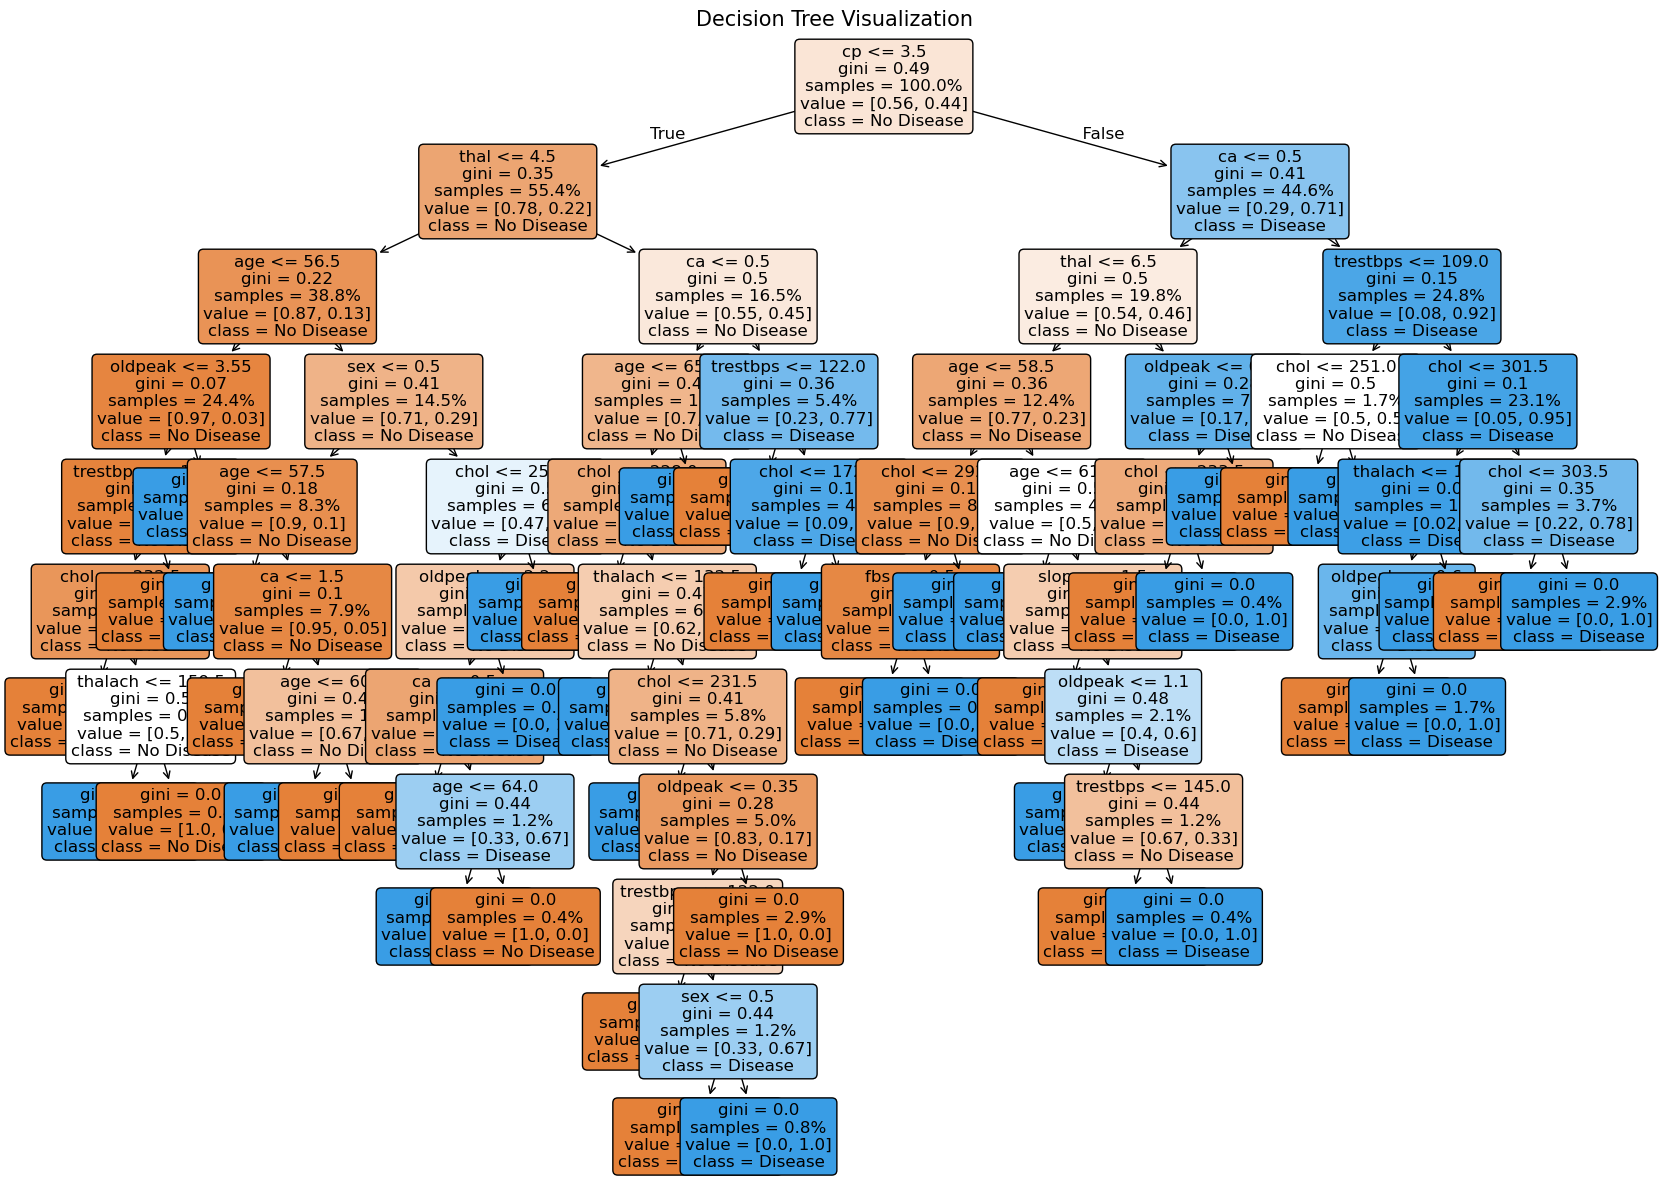

In [29]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 15))  # Set the figure size for better readability

# Plot the tree
plot_tree(tree_classifier, 
          feature_names=X.columns.tolist(),  
          class_names=['No Disease', 'Disease'],  
          filled=True,  
          rounded=True,  
          fontsize=12,  # Increase font size for better readability
          precision=2,  # Number of decimal places for numerical values
          proportion=True,  # Show proportions of each class
          max_depth=10)  # Limit the depth of the tree to reduce complexity

plt.title('Decision Tree Visualization', fontsize=15)  # Add a title for clarity
plt.show()